In [1]:
!pip install pip install keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, Flatten,Dropout, Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, callbacks, utils, applications, optimizers
import seaborn as sns
from google.colab.patches import cv2_imshow
#import streamlit as st
import PIL
from PIL import ImageFilter,ImageEnhance,Image
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from keras.applications import ResNet50V2

from keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import MobileNet
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loaded the images of dataset-koli-degar-non

Loaded the images of dataset-koli-khod-non

(1788, 224, 224, 3)


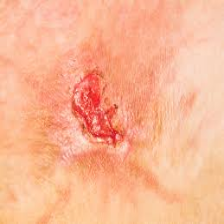

In [4]:
import os
data_path = '/content/drive/MyDrive/Colab Notebooks/p.gh/kol/nonstach/'
data_dir_list = os.listdir(data_path)


img_data=[]
img_data_list=[]
mean = 0

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))

    for img in img_list:
        input_img = cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
        input_img_resize = cv2.resize(input_img,(224,224))
        img_data_list.append(input_img_resize)


#img_data_list = np.expand_dims(np.array(img_data_list),3)
img_data = np.array(img_data_list)
#img_data = img_data/255.0
print(img_data.shape)
cv2_imshow(img_data[5])

In [5]:
import glob
train_labels = []
for directory_path in glob.glob('/content/drive/MyDrive/Colab Notebooks/p.gh/kol/nonstach/*/'):
    label = directory_path.split("/")[-2]
    print(label)

    #for i in range(0,2):
    for img_path in glob.glob(os.path.join(directory_path, '*'),recursive=False):
        train_labels.append(label)
    print(np.shape(train_labels))

#train_labels = [0 if item == 'd.non.mu' else item for item in train_labels ]
#train_labels = [1 if item == 'kh.non.mu' else item for item in train_labels ]
#train_labels = [2 if item == 'g2' else item for item in train_labels ]
#train_labels = [3 if item == 'g3' else item for item in train_labels ]
train_labels = np.transpose(np.array([train_labels]))
#0 = np.where(train_labels == "normal")
print(np.shape(train_labels) )

koli-degar-non
(827,)
koli-khod-non
(1788,)
(1788, 1)


In [6]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(train_labels)
# total 4 labels
print("class labels:")
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, label))

class labels:
1. koli-degar-non
2. koli-khod-non


In [7]:
dataTrain, dataTest, dataTrainLabels, dataTestLabels = train_test_split(img_data, labels, test_size=0.20)

#train_dataset = train.flow_from_directory('basedata/train/',target_size = (400,400),batch_size = 6, class_mode = 'binary')
#validation_dataset = train.flow_from_directory('basedata/validation/',target_size = (400,400),batch_size = 6, #number of samplesclass_mode = 'binary')

In [8]:
model = MobileNetV2(weights = "imagenet", input_shape = (224,224,3), include_top = False)

9406464/9406464 [==============================] - 0s 0us/step


In [9]:

baseModel = MobileNetV2(include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
        layer.trainable = False

model = Sequential()
model.add(baseModel)
    #model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))



In [10]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                25650     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                        

In [11]:
#model.compile(loss= "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [12]:

es = callbacks.EarlyStopping(monitor='loss', patience=50, verbose=2, mode='min', restore_best_weights=True)

rlp = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=50, min_lr=0.000001, mode='min', verbose=2)
#model.compile(loss= "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
#model.compile(optimizer='Adam', loss='mean_squared_error', metrics=[ 'acc']) #, metrics=['mae', 'acc']
history = model.fit(dataTrain, dataTrainLabels,validation_split=0.1,  epochs=500,callbacks=[es,rlp])#, epochs=200, batch_size=100, validation_split=0.05, callbacks=[es,rlp]

Epoch 1/500
41/41 [==============================] - 13s 141ms/step - loss: 2.8044 - accuracy: 0.6162 - val_loss: 0.6624 - val_accuracy: 0.6084 - lr: 0.0010
Epoch 2/500
41/41 [==============================] - 2s 54ms/step - loss: 0.7550 - accuracy: 0.6682 - val_loss: 0.5658 - val_accuracy: 0.7483 - lr: 0.0010
Epoch 3/500
41/41 [==============================] - 2s 48ms/step - loss: 0.7725 - accuracy: 0.6791 - val_loss: 0.5239 - val_accuracy: 0.8042 - lr: 0.0010
Epoch 4/500
41/41 [==============================] - 2s 57ms/step - loss: 0.6161 - accuracy: 0.7110 - val_loss: 0.4850 - val_accuracy: 0.8252 - lr: 0.0010
Epoch 5/500
41/41 [==============================] - 2s 49ms/step - loss: 0.6606 - accuracy: 0.7110 - val_loss: 0.4864 - val_accuracy: 0.8252 - lr: 0.0010
Epoch 6/500
41/41 [==============================] - 2s 59ms/step - loss: 0.6015 - accuracy: 0.7350 - val_loss: 0.4764 - val_accuracy: 0.8322 - lr: 0.0010
Epoch 7/500
41/41 [==============================] - 2s 58ms/step - 

In [13]:
test_preds = model.predict(dataTest)
model.evaluate( dataTest, dataTestLabels)

12/12 [==============================] - 0s 39ms/step - loss: 2.0828 - accuracy: 0.7989


[2.0828182697296143, 0.7988826632499695]

1/1 [==============================] - 1s 732ms/step
0.9977975
خودزنی


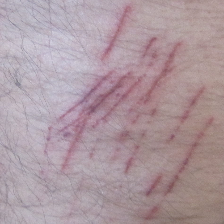

[[0.00220254 0.9977975 ]]
1/1 [==============================] - 0s 27ms/step
1.0
خودزنی


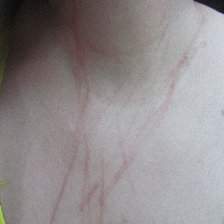

[[1.9176371e-35 1.0000000e+00]]
1/1 [==============================] - 0s 23ms/step
1.0
خودزنی


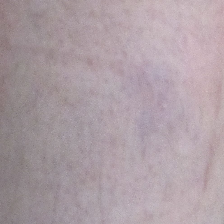

[[3.741178e-38 1.000000e+00]]
1/1 [==============================] - 0s 25ms/step
0.0
دگرزنی


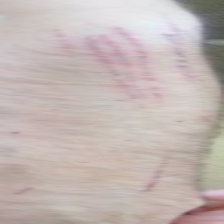

[[1. 0.]]
1/1 [==============================] - 0s 23ms/step
0.0
دگرزنی


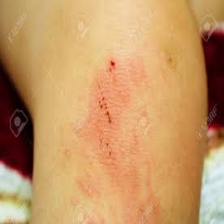

[[1. 0.]]
1/1 [==============================] - 0s 22ms/step
0.0
دگرزنی


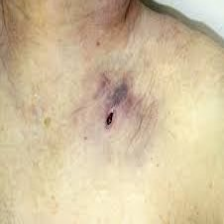

[[1. 0.]]
1/1 [==============================] - 0s 20ms/step
1.0
خودزنی


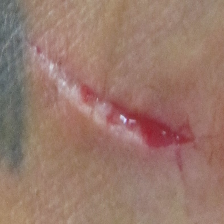

[[1.0270824e-22 1.0000000e+00]]
1/1 [==============================] - 0s 27ms/step
0.9999577
خودزنی


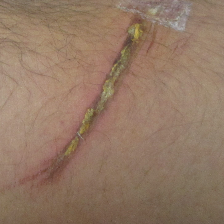

[[4.2306357e-05 9.9995768e-01]]
1/1 [==============================] - 0s 25ms/step
0.9999287
خودزنی


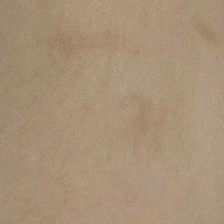

[[7.128076e-05 9.999287e-01]]
1/1 [==============================] - 0s 21ms/step
1.0
خودزنی


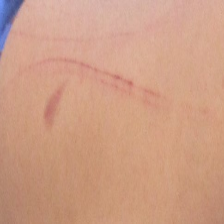

[[1.6059599e-09 1.0000000e+00]]
1/1 [==============================] - 0s 20ms/step
1.0
خودزنی


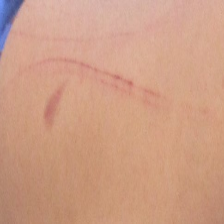

[[1.6059599e-09 1.0000000e+00]]
1/1 [==============================] - 0s 27ms/step
0.34197795
دگرزنی


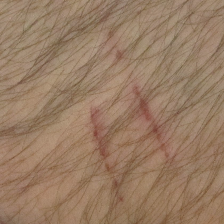

[[0.65802205 0.34197795]]
1/1 [==============================] - 0s 24ms/step
0.9999988
خودزنی


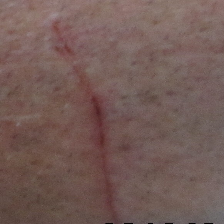

[[1.1354889e-06 9.9999881e-01]]
1/1 [==============================] - 0s 23ms/step
0.9980665
خودزنی


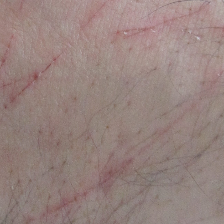

[[0.00193354 0.9980665 ]]
1/1 [==============================] - 0s 27ms/step
0.0
دگرزنی


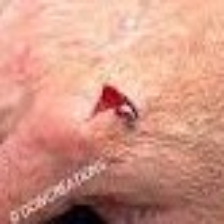

[[1. 0.]]
1/1 [==============================] - 0s 23ms/step
0.0
دگرزنی


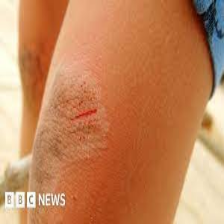

[[1. 0.]]
1/1 [==============================] - 0s 29ms/step
0.0
دگرزنی


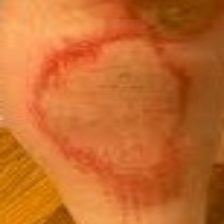

[[1. 0.]]
1/1 [==============================] - 0s 42ms/step
0.9997758
خودزنی


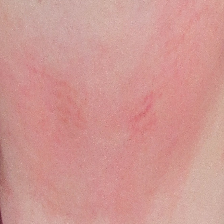

[[2.2413023e-04 9.9977583e-01]]
1/1 [==============================] - 0s 40ms/step
0.00030922386
دگرزنی


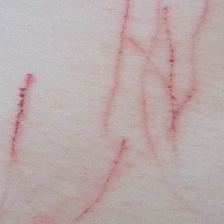

[[9.9969077e-01 3.0922386e-04]]
1/1 [==============================] - 0s 32ms/step
1.0
خودزنی


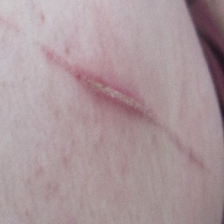

[[9.312128e-26 1.000000e+00]]


In [14]:
a = np.random.choice(dataTest.shape[0], 20)
for i in a:

  img = np.expand_dims(dataTest[i], axis=0)

  prediction = model.predict(img)
  print(prediction[0,1])
  if prediction[0,1]>prediction[0,0]:
    print('خودزنی')
  else:
      print('دگرزنی')
  cv2_imshow(dataTest[i])
  print(prediction)

(224, 224, 3)
1/1 [==============================] - 0s 20ms/step
0.0
دگرزنی


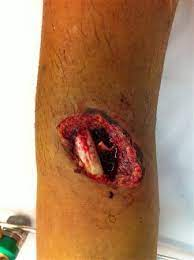

In [15]:
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/p.gh/kol/nonstach/koli-degar-non/1 (2).jpg')
img = cv2.resize(img1,(224,224))
img = np.array(img)
print(img.shape)
img = np.expand_dims(img, axis=0)


prediction = model.predict(img)
print(prediction[0,1])
if prediction[0,1]>prediction[0,0]:
    print('خودزنی')
else:
    print('دگرزنی')
cv2_imshow(img1)

In [18]:
!pip install h5py

In [19]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [31]:
from tensorflow.keras.models import model_from_json
json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()


loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [32]:
loaded_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [33]:
loaded_model.evaluate( dataTest, dataTestLabels)

12/12 [==============================] - 3s 41ms/step - loss: 2.0828 - accuracy: 0.7989


[2.0828182697296143, 0.7988826632499695]